In [3]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input,BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array 



In [4]:
img_size=150
batch_size=32

traingen=ImageDataGenerator(rescale=1/255.,
                           brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)
#rescale ==> Rescales the pixel values with the 0-1 range
#Randomly rotates the image, max. 50 degree
#Randomly set the brightness of the image within the given range


testgen=ImageDataGenerator(rescale=1/255.)

valgen=ImageDataGenerator(rescale=1/255.,                    
                           brightness_range=[0.2,1.2],
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)

In [5]:
traindata=traingen.flow_from_directory('G:/CNN XRAY IMG/chest_xray/chest_xray/train',
                                   target_size=(img_size,img_size),
                                   batch_size = batch_size,
                                   shuffle=True,
                                   class_mode='binary',
                                   color_mode='grayscale')
testdata=testgen.flow_from_directory('G:/CNN XRAY IMG/chest_xray/chest_xray/test',
                                    shuffle=False,
                                    batch_size=batch_size,
                                    target_size=(img_size,img_size),
                                    class_mode='binary',
                                    color_mode='grayscale')
valdata=valgen.flow_from_directory('G:/CNN XRAY IMG/chest_xray/chest_xray/val',
                                  shuffle=False,
                                    batch_size=batch_size,
                                   target_size=(img_size,img_size),
                                   class_mode='binary',
                                   color_mode='grayscale'
                                  )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [7]:

os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
model=Sequential() #Layer by layer NN starts here
model.add(Conv2D(32,(2,2),input_shape=(img_size,img_size,1),activation="relu",padding='same',strides=1))
#32 Filters of size 2x2, input shape of the image in given size and grayscale, using relu activation function, stride is the step size
model.add(MaxPooling2D())
#Pooling and decreasing of the dimensions
model.add(Conv2D(64,(2,2),strides=2,activation="relu",padding="same"))
#64 filters and larger strides of 2
model.add(MaxPooling2D())
model.add(Conv2D(128,(2,2), strides=1,activation="relu",padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
#Flattens the previous layer, converting the multi-dimentional image to a complete single-dimension
model.add(Dense(128,activation="relu"))
#Fully connected network with 128 neurons
model.add(Dense(1,activation='sigmoid'))
#Final output layer with only one neuron, satisfying our need of classifying binary

In [8]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(traindata,validation_data=valdata, epochs=15)

Epoch 1/15
163/163 [==============================] - 270s 2s/step - loss: 0.4536 - accuracy: 0.7905 - val_loss: 1.0165 - val_accuracy: 0.5625
Epoch 2/15
163/163 [==============================] - 286s 2s/step - loss: 0.2548 - accuracy: 0.8936 - val_loss: 0.6669 - val_accuracy: 0.6875
Epoch 3/15
163/163 [==============================] - 300s 2s/step - loss: 0.2170 - accuracy: 0.9151 - val_loss: 0.7020 - val_accuracy: 0.6875
Epoch 4/15
163/163 [==============================] - 284s 2s/step - loss: 0.2024 - accuracy: 0.9201 - val_loss: 1.1495 - val_accuracy: 0.8125
Epoch 5/15
163/163 [==============================] - 293s 2s/step - loss: 0.1655 - accuracy: 0.9362 - val_loss: 1.0371 - val_accuracy: 0.6875
Epoch 6/15
163/163 [==============================] - 279s 2s/step - loss: 0.1702 - accuracy: 0.9348 - val_loss: 0.8494 - val_accuracy: 0.7500
Epoch 7/15
163/163 [==============================] - 265s 2s/step - loss: 0.1695 - accuracy: 0.9350 - val_loss: 0.5624 - val_accuracy: 0.6875

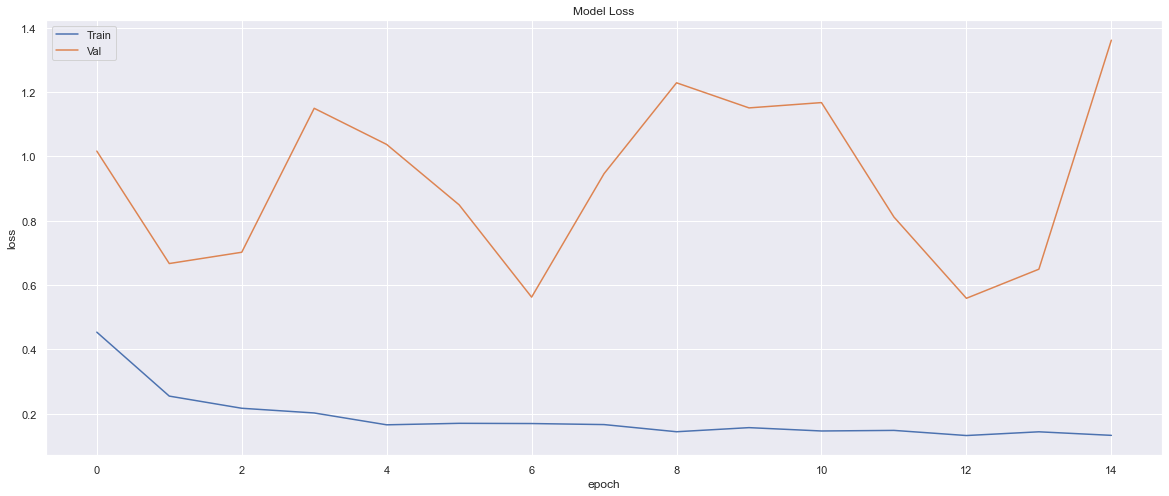

In [10]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
#plot the training loss over every epoch
plt.plot(history.history['val_loss'])
#plot the validation loss
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

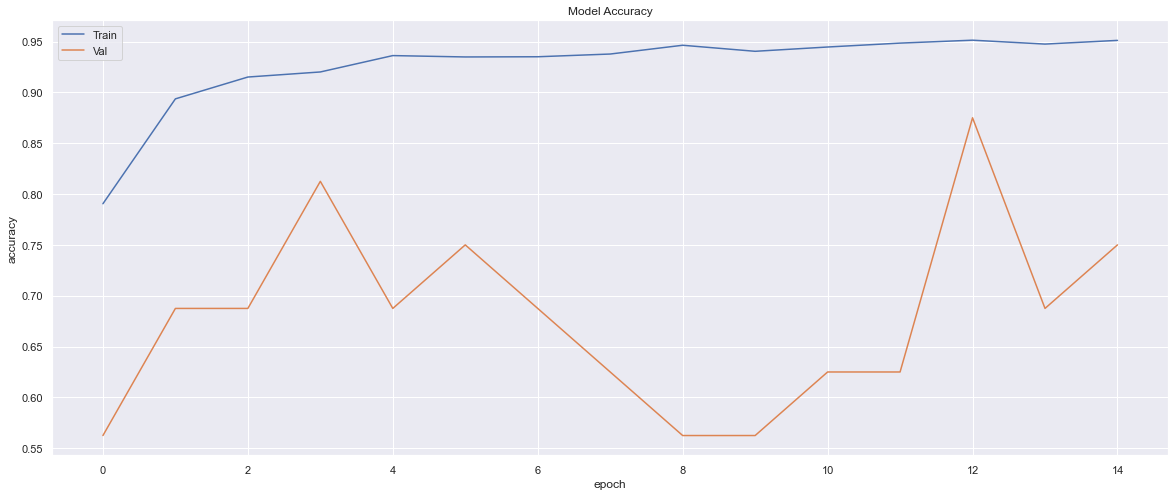

In [11]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
#plot the training accuracy over all the epochs
plt.plot(history.history['val_accuracy'])
#plot the validation accuracy over all the epochs
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [12]:
y_test=valdata.classes
#has all the labels in form of binary for all the samples in the validation dataset
y_pred=model.predict(valdata)
#predicts the probabilities of every sample in the validation dataset using the trained model
y_pred_probs=y_pred.copy()
#saves a copy of the predicted probabilities
y_pred[y_pred>0.5]=1
#makes all the predictions with probability greater that 0.5 equal to calss label 1 
y_pred[y_pred<0.5]=0
#makes all the predictions with probability smaller that 0.5 equal to class label 0 

1/1 [==============================] - 2s 2s/step


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, y_pred, target_names=['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       1.00      0.25      0.40         8
   Pneumonia       0.57      1.00      0.73         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16



In [10]:
model = Sequential([
    Conv2D(32,(5,5), activation = 'relu', input_shape=(258,258,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(5,5), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(16,(2,2), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation ='relu'),
    Dense(32, activation ='relu'),
    Dense(2,activation = 'sigmoid')
])
# model 4 done
# increase image size 100*100 to 258*258

In [11]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batchsize,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batchsize
)

Epoch 1/30


ResourceExhaustedError: Graph execution error:

Detected at node sequential_1/conv2d_4/Relu defined at (most recent call last):
  File "C:\Users\A S U S\anaconda3\lib\runpy.py", line 197, in _run_module_as_main

  File "C:\Users\A S U S\anaconda3\lib\runpy.py", line 87, in _run_code

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>

  File "C:\Users\A S U S\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start

  File "C:\Users\A S U S\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "C:\Users\A S U S\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever

  File "C:\Users\A S U S\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once

  File "C:\Users\A S U S\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute

  File "C:\Users\A S U S\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell

  File "C:\Users\A S U S\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell

  File "C:\Users\A S U S\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell

  File "C:\Users\A S U S\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\A S U S\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async

  File "C:\Users\A S U S\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes

  File "C:\Users\A S U S\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code

  File "C:\Users\A S U S\AppData\Local\Temp\ipykernel_8012\1943462451.py", line 1, in <cell line: 1>

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1126, in train_step

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\A S U S\AppData\Roaming\Python\Python39\site-packages\keras\src\backend.py", line 5397, in relu

OOM when allocating tensor with shape[64,254,254,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sequential_1/conv2d_4/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_3875]

In [ ]:
model.fit(x_train,y_train,epochs=30,batch_size=64)

In [14]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 258, 258
batchsize = 64
epochs = 10
num_of_class = 2

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Images using Flow From Directory
train_generator = train_datagen.flow_from_directory(
    'G:/CNN XRAY IMG/chest_xray/chest_xray/train',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    'G:/CNN XRAY IMG/chest_xray/chest_xray/val',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'G:/CNN XRAY IMG/chest_xray/chest_xray/test',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical')

# Model Definition
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_of_class, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    epochs=epochs,
    batch_size=new_batch_size,  # Specify a smaller batch size
    validation_data=validation_generator)

# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


NameError: name 'new_batch_size' is not defined

In [7]:
import pandas as pd
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_width, img_height = 258, 258
batchsize = 64
epochs = 10
num_of_class = 2

def load_images_from_directory(directory):
    images = []
    labels = []
    label_mapping = {}  # Dictionary to map class labels to numeric values

    for idx, class_label in enumerate(os.listdir(directory)):
        class_path = os.path.join(directory, class_label)

        if os.path.isdir(class_path):  # Check if it's a directory
            label_mapping[class_label] = idx  # Map class label to a numeric value

            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)

                # Skip non-image files
                if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    continue

                img = load_img(img_path, target_size=(img_width, img_height))
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(tf.keras.utils.to_categorical(idx, num_of_class))

    return np.array(images), np.array(labels), label_mapping

# Load Images
x_train, y_train, label_mapping_train = load_images_from_directory('G:/CNN XRAY IMG/chest_xray/chest_xray/train')
x_val, y_val, label_mapping_val = load_images_from_directory('G:/CNN XRAY IMG/chest_xray/chest_xray/val')
x_test, y_test, label_mapping_test = load_images_from_directory('G:/CNN XRAY IMG/chest_xray/chest_xray/test')

# Model Definition
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_of_class, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    validation_data=(x_val, y_val))

# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')


IndexError: index 2 is out of bounds for axis 1 with size 2